In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [9]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 14298, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 14298 (delta 59), reused 68 (delta 31), pack-reused 14194
Receiving objects: 100% (14298/14298), 13.33 MiB | 29.74 MiB/s, done.
Resolving deltas: 100% (9871/9871), done.


In [10]:
# Create the .yaml which controls the directories passed into the model

f = open("dataset.yaml", "a")
f.truncate(0) # clear file
f.write("test: /kaggle/input/isic-2017-640x640/datasets/Test/\n")
f.write("train: /kaggle/input/isic-2017-640x640/datasets/Train/\n")
f.write("val: /kaggle/input/isic-2017-640x640/datasets/Validate/\n")
f.write("nc: 2\n")
f.write("names: ['melanoma', 'not melanoma']\n")
f.close()

In [11]:
#%cd ..

In [12]:
%cd yolov5

/kaggle/working/yolov5/yolov5


In [13]:
#!pip install wandb

In [15]:
# 50 Epochs
!python train.py --img 640 --batch 16 --epochs 50 --data ../dataset.yaml --weights yolov5s.pt --device 0

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937

In [19]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.4 --source /kaggle/input/isic-2017-640x640/datasets/Test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/kaggle/input/isic-2017-640x640/datasets/Test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/600 /kaggle/input/isic-2017-640x640/datasets/Test/images/ISIC_0012086_resized_640.jpg: 640x640 (no detections), 7.1ms
image 2/600 /kaggle/input/isic-2017-640x640/datasets/Test/images/ISIC_0012092_resized_640.jpg: 640x640 1 melanoma, 6.9ms
image 3/600 /kaggle/input/isic-2017-640x640/datasets/Test/im

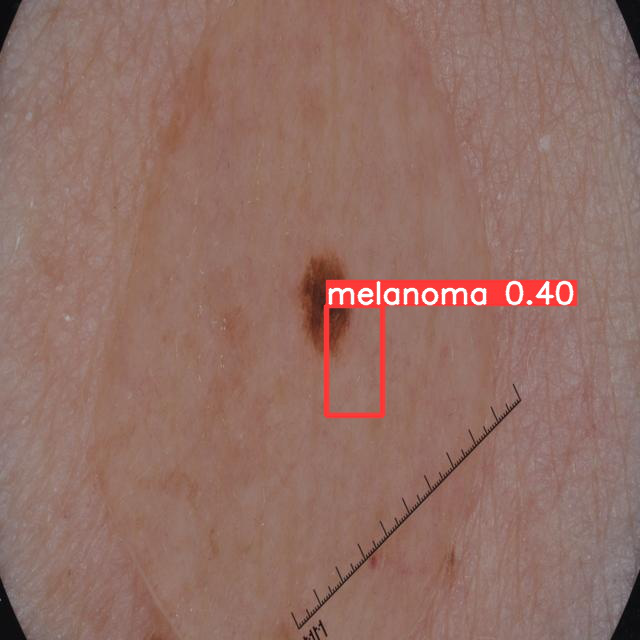

In [20]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp4/ISIC_0016065_resized_640.jpg"
display(Image.open(image_path))

In [23]:
# Validate YOLOv5s on validation
!python val.py --weights runs/train/exp2/weights/best.pt --data ../dataset.yaml --img 640 --half

val: data=../dataset.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/kaggle/input/isic-2017-640x640/datasets/Validate/labels' images 
val: WARNING ⚠️ Cache directory /kaggle/input/isic-2017-640x640/datasets/Validate is not writeable: [Errno 30] Read-only file system: '/kaggle/input/isic-2017-640x640/datasets/Validate/labels.cache.npy'
                 Class     Images  Instances          P          R      mAP50   
                   all        150        150      0.334      0.471      0.375      0.219
     